<h1> Import </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')
import sklearn.model_selection as ms
from scipy.stats import norm
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, Lasso, ElasticNet 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from xgboost import XGBRegressor
%matplotlib inline

In [2]:
#import dataset
model_trainylog = pd.read_csv('cleanedtrainwithYlog.csv')
model_test = pd.read_csv('cleanedtest.csv')

In [3]:
model_trainylog.head()

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ylogSalePrice
0,0,6.684507,6.831328,20.212182,3.440268,3.055642,15.187527,15.187527,9.059126,12.170327,...,0,0,0,1,0,0,0,1,0,12.247699
1,1,4.858807,7.221214,20.712205,3.259674,3.602594,15.145138,15.145138,1.000000,13.062832,...,0,0,0,1,0,0,0,1,0,12.109016
2,2,6.684507,6.914940,21.347241,3.440268,3.055642,15.184404,15.185966,8.646538,11.200343,...,0,0,0,1,0,0,0,1,0,12.317171
3,3,6.968981,6.684507,20.691553,3.440268,3.055642,15.047529,15.135652,1.000000,9.274266,...,0,0,0,1,0,0,0,0,0,11.849405
4,4,6.684507,7.314735,22.325160,3.602594,3.055642,15.182841,15.182841,10.391827,11.971129,...,0,0,0,1,0,0,0,1,0,12.429220


<h1> Train and Test Data Split </h1>

In [4]:
X = model_trainylog.drop(['ylogSalePrice'], axis = 1)
y = model_trainylog['ylogSalePrice']

In [5]:
#Partition the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2)

In [6]:
# Stratified KFold
stratify_divide = StratifiedKFold(n_splits=10, shuffle=True, random_state=99)

In [7]:
# KFold for Cross Validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 28)

In [8]:
#RMSE_CV
def rmse_cv(model):
    kf = KFold(n_splits = 5, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

<h1> XGBoost </h1>

In [9]:
xgb = XGBRegressor()

xgb.set_params(random_state=22)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=22,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [10]:
xgb.fit(X_train, y_train)

[20:54:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=22,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [11]:
print("The train set R^2 is: %.5f" % xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % xgb.score(X_test, y_test))

The train set R^2 is: 0.95912
The test set R^2 is is: 0.89865


In [12]:

# Initial prediction
xgb_pred = xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14232.28
Mean Squared Error (MSE): 0.016007763138377568
Root Mean Square Error (RMSE): 0.12652178918422538
Mean Absolute Percent Error (MAPE): 8.91 %.


In [13]:
xgb_param_grid ={'learning_rate': [0.01, 0.05, 0.1],
                 'max_depth': [2, 3, 4, 5, 6],
                 'min_child_weight': [4, 5, 6],
                 'n_estimators': [400, 450, 500, 550, 600]}

grid_search_xgb = GridSearchCV(xgb, xgb_param_grid, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)

%time grid_search_xgb.fit(X_train, y_train)

[21:54:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 10.8 s, sys: 490 ms, total: 11.3 s
Wall time: 59min 53s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthrea...
                                    objective='reg:linear', random_state=22,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
      

In [14]:
# get the best parameters
grid_search_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 400}

In [15]:
grid_xgb = grid_search_xgb.best_estimator_

In [16]:
print("The train set R^2 is: %.5f" % grid_xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_xgb.score(X_test, y_test))

The train set R^2 is: 0.98670
The test set R^2 is is: 0.90323


In [17]:
#Prediction with tuned hyperparameters
grid_xgb_pred = grid_xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13724.91
Mean Squared Error (MSE): 0.015283358342410897
Root Mean Square Error (RMSE): 0.12362588055262093
Mean Absolute Percent Error (MAPE): 8.55 %.


In [18]:
xgb_param_grid1 ={'learning_rate': [0.01],
                 'max_depth': [3],
                 'min_child_weight': [0],
                 'n_estimators': [3460],
                 'subsample': [0.7],
                 'colsample_bytree' : [0.7],
                 'objective':['reg:linear'],
                 'nthread':[-1],
                 'scale_pos_weight':[1],
                 'seed':[27],
                 'reg_alpha': [0.00006]}
                 

grid_search_xgb1 = GridSearchCV(xgb, xgb_param_grid1, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)

%time grid_search_xgb1.fit(X_train, y_train)

[21:55:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 33.1 s, sys: 90.2 ms, total: 33.2 s
Wall time: 1min 55s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthrea...
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.01],
                         'max_depth': [3], 'min_child_weight': [0],
                         'n_estimators': [3460], 'nthread': [-1],
                         'objective': ['reg:linear'], 'reg_alpha': [6e-05],
                         'scale_pos_weight': [1], 'seed': [27],

In [19]:
grid_search_xgb1.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 0,
 'n_estimators': 3460,
 'nthread': -1,
 'objective': 'reg:linear',
 'reg_alpha': 6e-05,
 'scale_pos_weight': 1,
 'seed': 27,
 'subsample': 0.7}

In [20]:
grid_xgb1 = grid_search_xgb1.best_estimator_

In [21]:
print("The train set R^2 is: %.5f" % grid_xgb1.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_xgb1.score(X_test, y_test))

The train set R^2 is: 0.98829
The test set R^2 is is: 0.90817


In [22]:
#Prediction with tuned hyperparameters
grid_xgb_pred1 = grid_xgb1.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_xgb_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_xgb_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13724.91
Mean Squared Error (MSE): 0.014503351693103538
Root Mean Square Error (RMSE): 0.12042986213187964
Mean Absolute Percent Error (MAPE): 8.55 %.


In [23]:
score = rmse_cv(grid_xgb)
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[21:56:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBoost score: 0.1198 (0.0116)



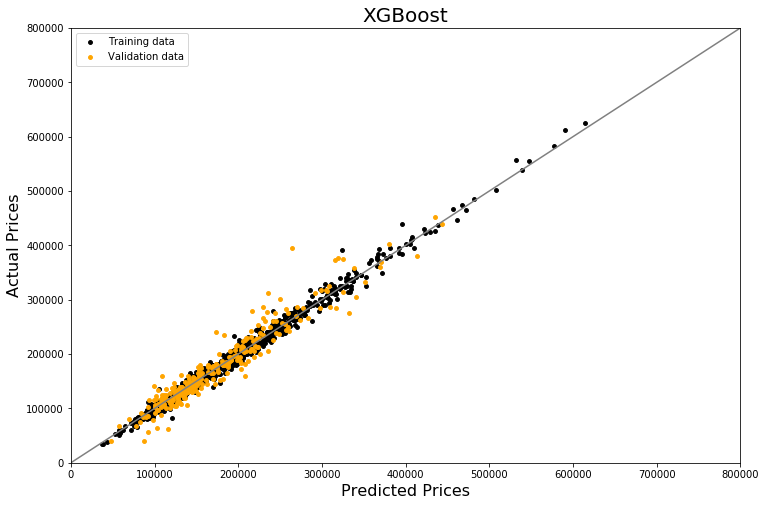

In [24]:
y_train_xgboost =grid_xgb.predict(X_train)
y_test_xgboost = grid_xgb.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_xgboost), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_xgboost), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("XGBoost", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [25]:
# Get numerical feature importances
importances_xgb = list(xgb.feature_importances_)

# List of tuples with variable and importance
feature_importances_xgb = [(feature, round(importance, 5)) for feature, importance in zip(X_train.columns, importances_xgb)]

# Sort the feature importances by most important first
xgb_feature_importances = sorted(feature_importances_xgb, key = lambda x: x[1], reverse = True )

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in xgb_feature_importances]

Variable: OverallQual          Importance: 0.13884000480175018
Variable: CentralAir_Y         Importance: 0.10898999869823456
Variable: TotalSF              Importance: 0.08510000258684158
Variable: TotalBath            Importance: 0.0810299962759018
Variable: Fireplaces           Importance: 0.06905999779701233
Variable: MSZoning_RL          Importance: 0.04253999888896942
Variable: YearRemodAdd         Importance: 0.031209999695420265
Variable: YearBuilt            Importance: 0.03099999949336052
Variable: GarageType_Attchd    Importance: 0.027809999883174896
Variable: GarageCars           Importance: 0.02558000013232231
Variable: MSZoning_RM          Importance: 0.023989999666810036
Variable: BsmtFinType1_GLQ     Importance: 0.019990000873804092
Variable: GarageArea           Importance: 0.015949999913573265
Variable: Heating_Grav         Importance: 0.015039999969303608
Variable: BsmtFinSF1           Importance: 0.014379999600350857
Variable: Neighborhood_Sawyer  Importance: 0.0123

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [28]:
xgb_feature_importances_top20 = xgb_feature_importances[:20]
featureNames, featureScores = zip(*list(xgb_feature_importances_top20))
xgb_feature_importances_top20

[('OverallQual', 0.13884),
 ('CentralAir_Y', 0.10899),
 ('TotalSF', 0.0851),
 ('TotalBath', 0.08103),
 ('Fireplaces', 0.06906),
 ('MSZoning_RL', 0.04254),
 ('YearRemodAdd', 0.03121),
 ('YearBuilt', 0.031),
 ('GarageType_Attchd', 0.02781),
 ('GarageCars', 0.02558),
 ('MSZoning_RM', 0.02399),
 ('BsmtFinType1_GLQ', 0.01999),
 ('GarageArea', 0.01595),
 ('Heating_Grav', 0.01504),
 ('BsmtFinSF1', 0.01438),
 ('Neighborhood_Sawyer', 0.01238),
 ('KitchenAbvGr', 0.01174),
 ('SaleCondition_Normal', 0.0109),
 ('SaleType_New', 0.00984),
 ('Heating_GasA', 0.00977)]

Text(0.5, 1.0, 'Feature Importances')

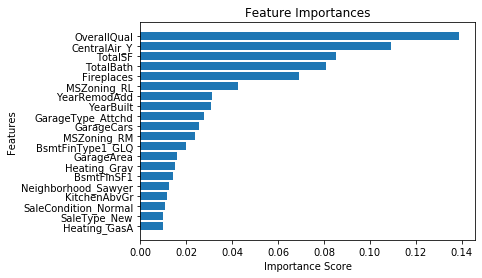

In [29]:
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.gca().invert_yaxis()
plt.title('feature importance')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importances')

In [30]:
xgb_params_tuned_model = grid_search_xgb.best_estimator_
xgb_feature_importance = 100.0 * (xgb_params_tuned_model.feature_importances_ / xgb_params_tuned_model.feature_importances_.max())
xgb_important_features = X_train.columns[xgb_feature_importance >= 2]
xgb_unimportant_features = X_train.columns[xgb_feature_importance < 2]

In [31]:
xgb_important_features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'YrSold', 'TotalSF',
       'TotalBath', 'TotalPorchSF', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_Reg', 'LotConfig_CulDSac', 'Neighborhood_Crawfor',
       'Neighborhood_IDOTRR', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Condition1_Norm', 'HouseStyle_1Story', 'Exterior1st_BrkFace',
       'Exterior1st_HdBoard', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace',
       'ExterQual_Gd', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'BsmtFinType1_GLQ', 'Heating_GasA', 'HeatingQC_Fa', 'CentralAir_Y',
       'Electrical_FuseA', 'Electrical_SBrkr', 'KitchenQual_TA',
       'Functional_Typ', 'FireplaceQu_TA', 'SaleT

In [32]:
X_train_xgbreduced = X_train.drop(xgb_unimportant_features, axis=1)
X_test_xgbreduced = X_test.drop(xgb_unimportant_features, axis=1)

In [33]:
# GridSearchCV for multiple hyperparameters:
xgb=XGBRegressor()

xgb_param_grid ={'learning_rate': [0.05, 0.1, 0.15],
             'max_depth': [3, 4, 5],
             'n_estimators': [500, 1000, 2000]}

xgb.set_params(random_state=42)

grid_search_xgb2 = GridSearchCV(xgb, xgb_param_grid, scoring= 'neg_mean_squared_error',
                           cv= kf, n_jobs = 7, return_train_score=True, verbose = 1)
grid_search_xgb2.fit(X_train_xgbreduced, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  1.2min
[Parallel(n_jobs=7)]: Done 135 out of 135 | elapsed:  3.8min finished


[22:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthrea...e,
                                    objective='reg:linear', random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=7,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
     

In [34]:
# Use the xgboost's predict method on the test data
predictions_tuned_xgb2 = grid_search_xgb2.best_estimator_.predict(X_test_xgbreduced)

# Calculate the absolute errors
errors = abs(np.expm1(predictions_tuned_xgb2) - np.expm1(y_test))

# Print out the mean absolute error (MAE)
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('MSE:', mean_squared_error(y_test, predictions_tuned_xgb2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_tuned_xgb2)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))

# Calculate and display MAPE
#accuracy = 100 - np.mean(mape)
print('MAPE:', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13910.3
MSE: 0.015375817142572686
RMSE: 0.1239992626694719
MAPE: 8.72 %.


In [48]:
#Back to csv for kaggle
test_predict = grid_xgb.predict(model_test)
id_price = list(zip(range(1461, 2920), np.expm1(test_predict)))
id_price = list(map(lambda x: [x[0], round(x[1], 1)], id_price))
final_df = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])

In [49]:
final_df

,Id,SalePrice
0,1461,123898.398438
1,1462,160521.906250
2,1463,184826.500000
3,1464,189598.093750
4,1465,175771.406250
5,1466,170923.906250
6,1467,178235.796875
7,1468,169493.500000
8,1469,191346.296875
9,1470,117558.796875


In [50]:
final_df.to_csv('predictions_submission.csv', index=False)